# Imports

In [43]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, accuracy_score, confusion_matrix, classification_report
from xgboost import XGBRegressor, XGBClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load Data

In [44]:
# https://archive.ics.uci.edu/dataset/186/wine+quality

In [45]:
# Load the datasets
red_wine = pd.read_csv('wine+quality/winequality-red.csv', delimiter=';', header=0)
white_wine = pd.read_csv('wine+quality/winequality-white.csv', delimiter=';', header=0)

# Add the 'color' column to each dataset
red_wine['colour'] = 'red'
white_wine['colour'] = 'white'

# Concatenate both datasets
wine_data = pd.concat([red_wine, white_wine], ignore_index=True)

# Encode 'color' column (red: 0, white: 1)
wine_data['colour'] = wine_data['colour'].apply(lambda x: 1 if x == 'white' else 0)

wine_data.to_csv("wine.csv")

print(f"The data has {wine_data.shape[0]} rows and {wine_data.shape[1]} columns \n")

# Display the combined data
print(wine_data.head())

The data has 6497 rows and 13 columns 

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  colour  
0      9.4      

# Visualize the data

In [ ]:
# Set seaborn theme for better aesthetics
sns.set(style="whitegrid")

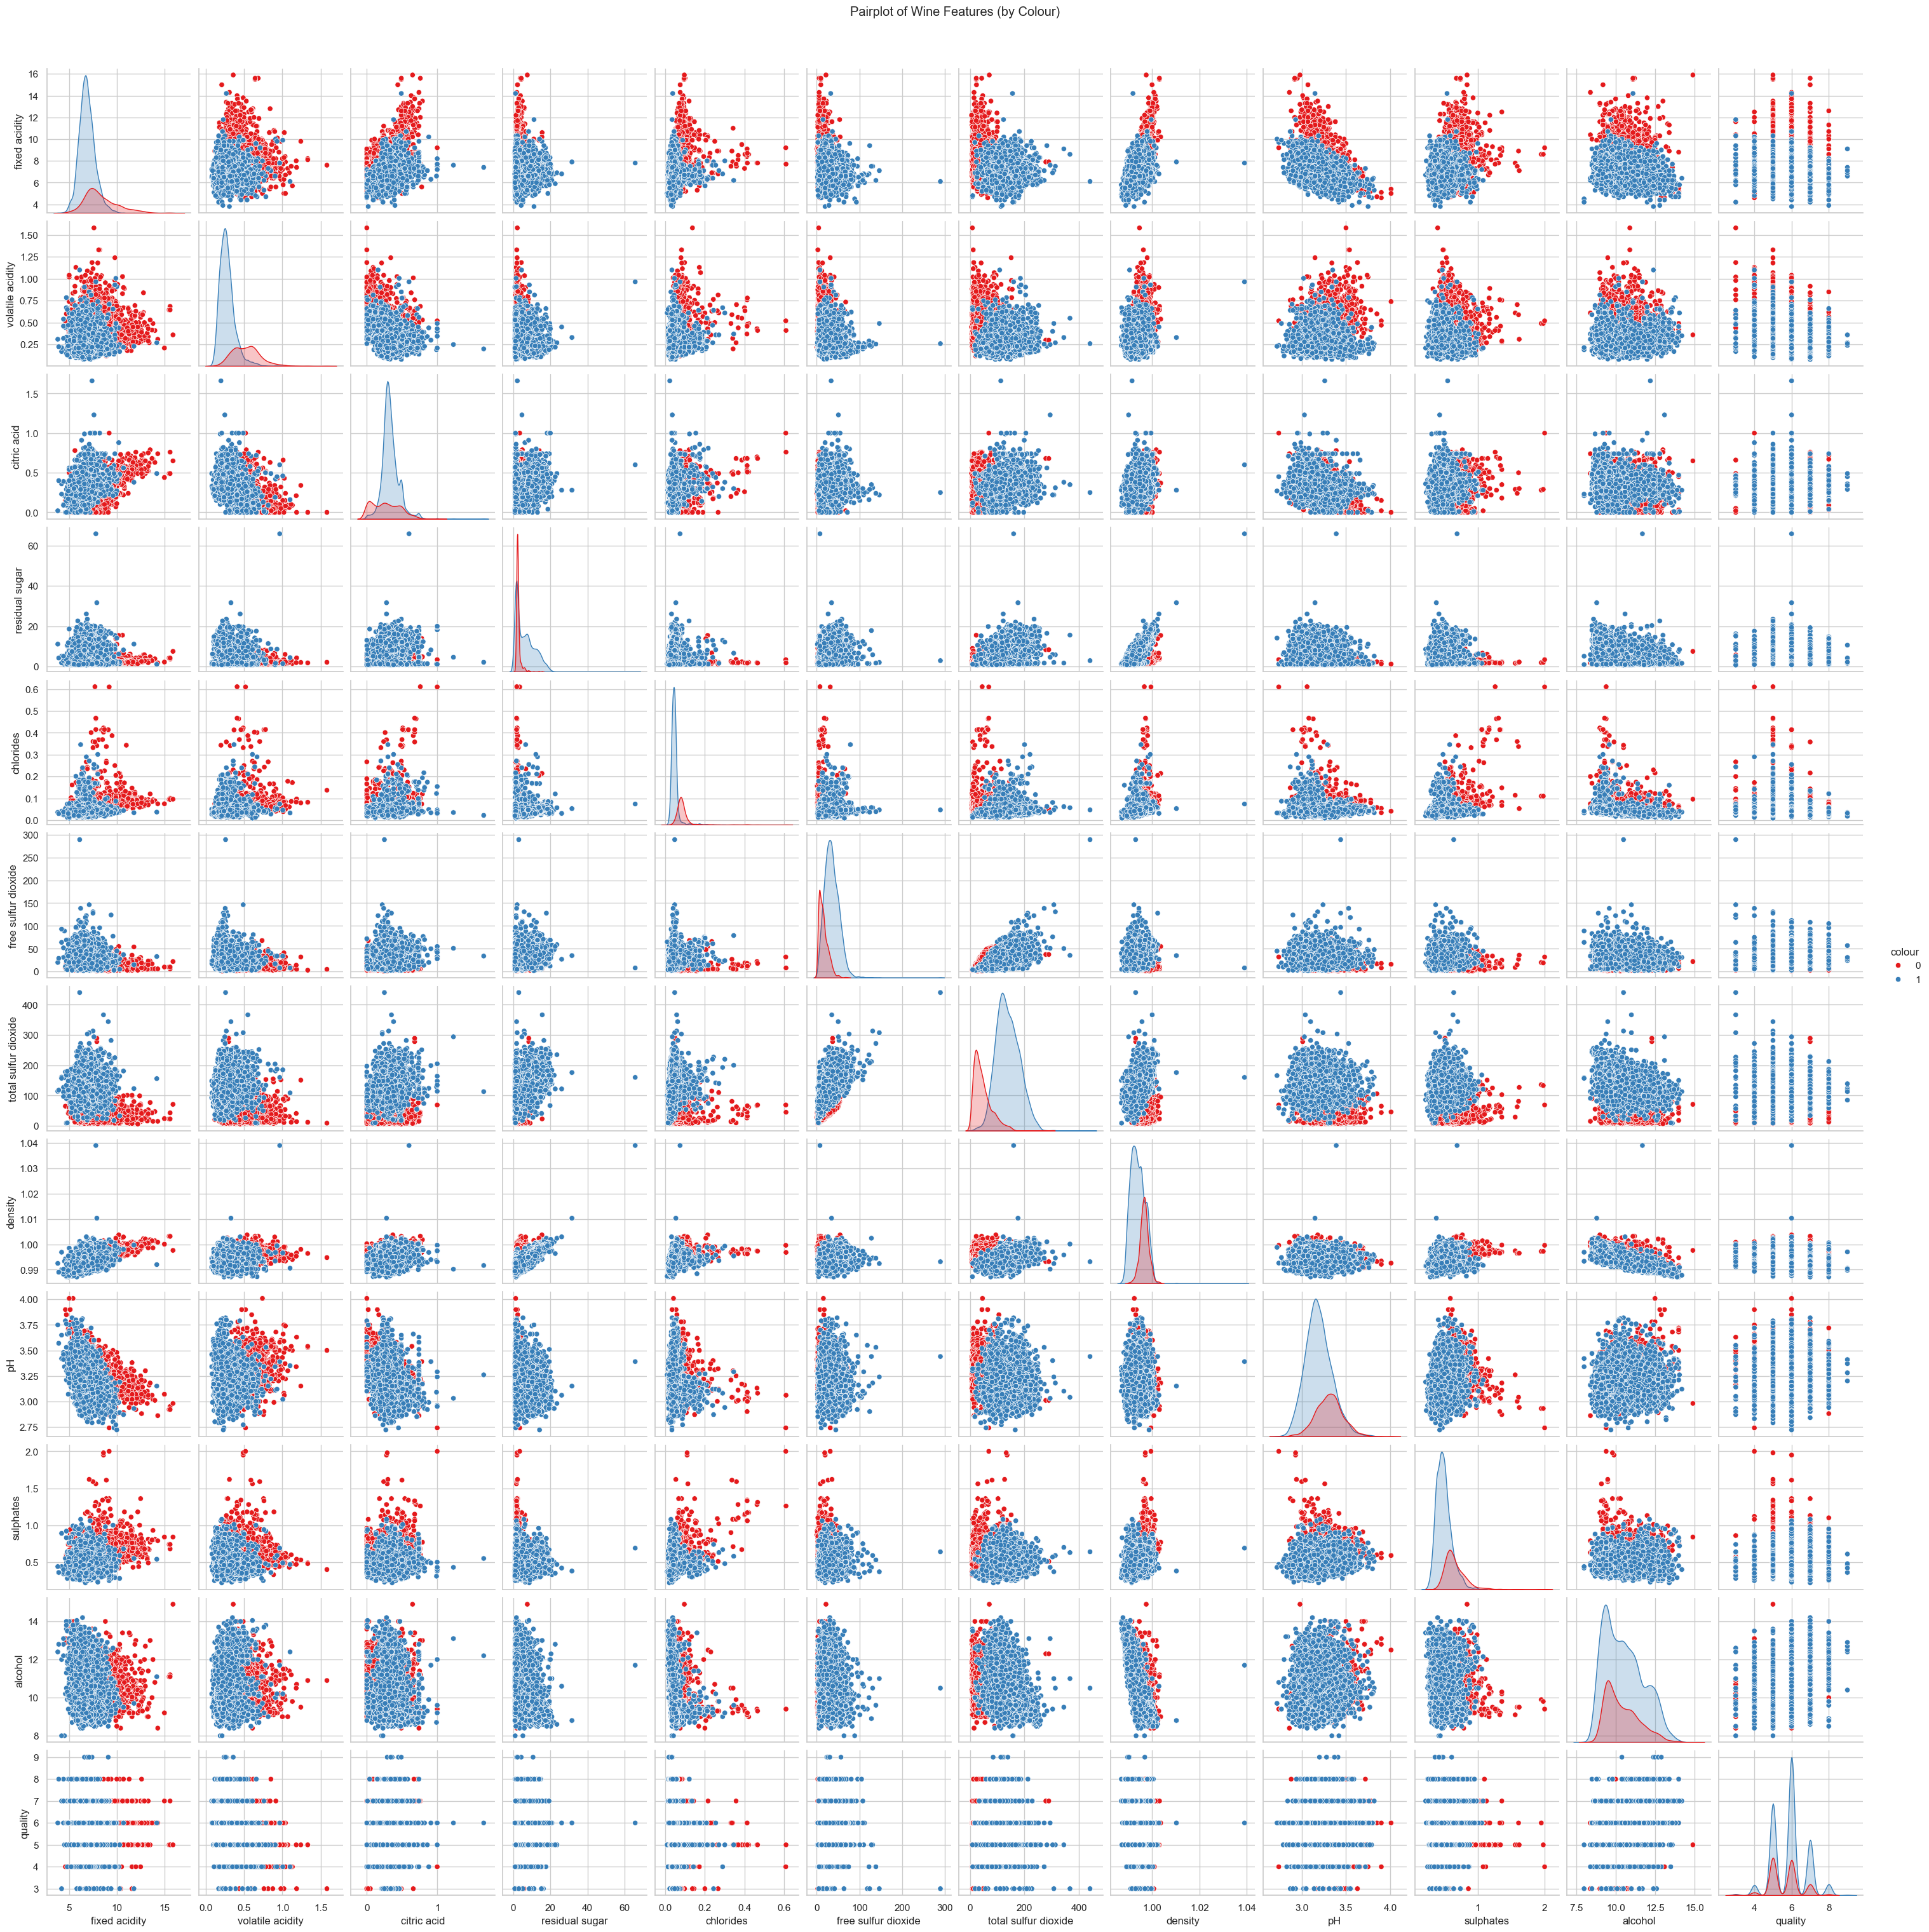

In [59]:
# 1. Pairplot to visualize relationships between features and the target (quality)
sns.pairplot(wine_data, hue='colour', diag_kind="kde", palette="Set1")
plt.suptitle("Pairplot of Wine Features (by Colour)", y=1.02)
plt.show()

/var/folders/k3/c3xvj_bs4zbghyks6ph03td80000gn/T/ipykernel_1598/2613262136.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='colour', y='quality', data=wine_data, palette="Set2")


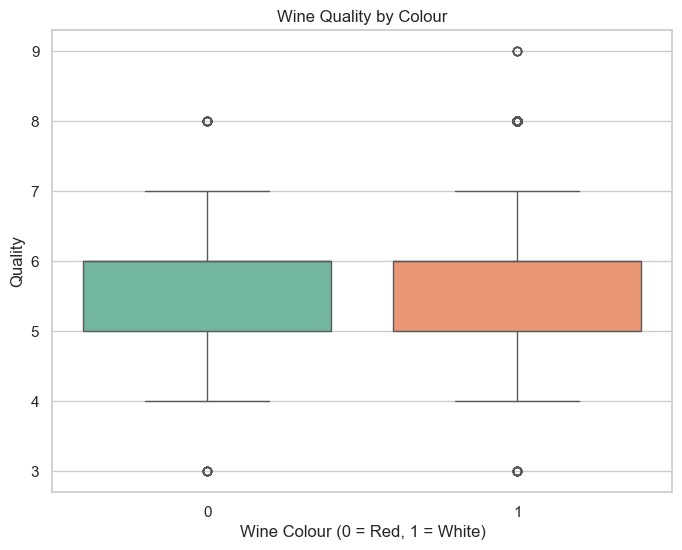

In [60]:
# 2. Boxplot to compare wine quality based on colour
plt.figure(figsize=(8, 6))
sns.boxplot(x='colour', y='quality', data=wine_data, palette="Set2")
plt.title("Wine Quality by Colour")
plt.xlabel("Wine Colour (0 = Red, 1 = White)")
plt.ylabel("Quality")
plt.show()

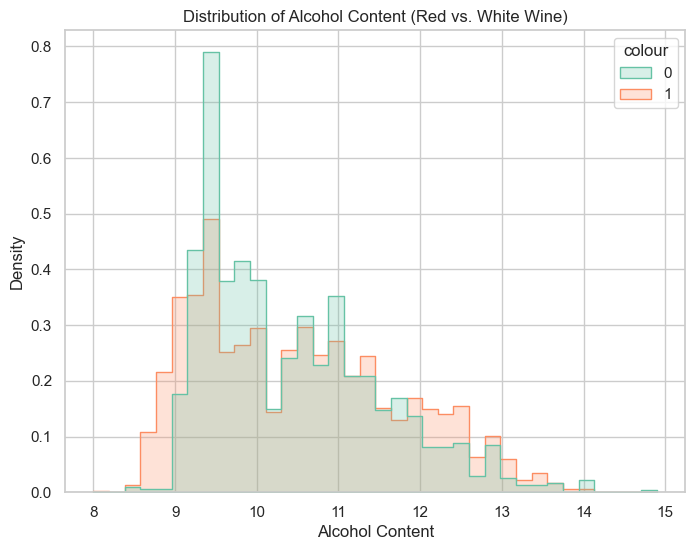

In [61]:
# 3. Distribution of alcohol content for red vs. white wines
plt.figure(figsize=(8, 6))
sns.histplot(data=wine_data, x="alcohol", hue="colour", element="step", stat="density", common_norm=False, palette="Set2")
plt.title("Distribution of Alcohol Content (Red vs. White Wine)")
plt.xlabel("Alcohol Content")
plt.ylabel("Density")
plt.show()

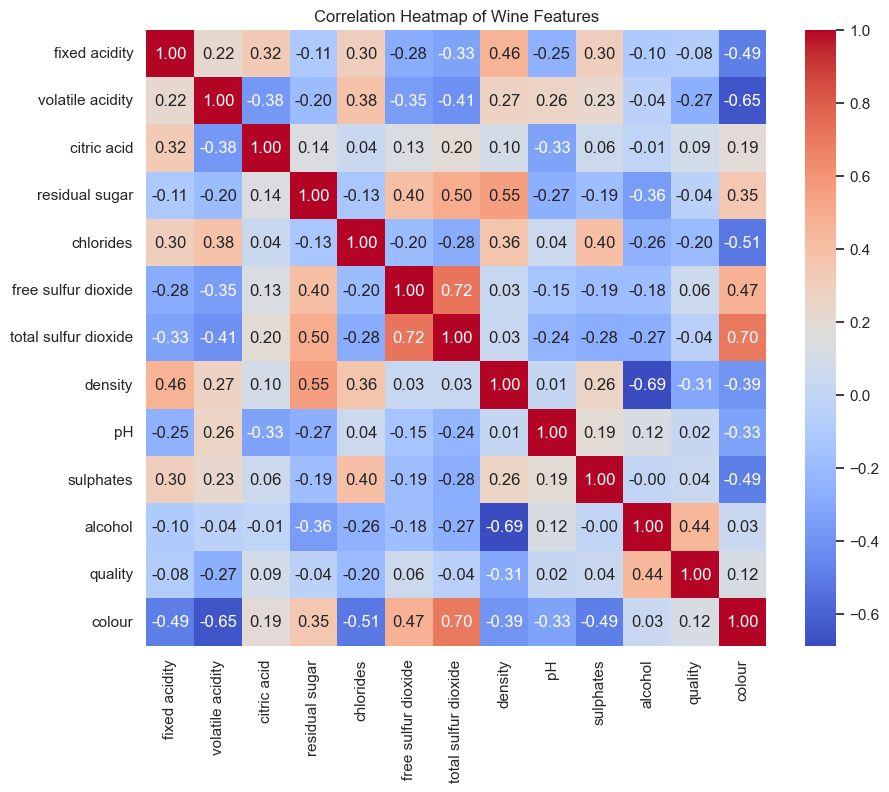

In [62]:
# 4. Correlation heatmap of all features
plt.figure(figsize=(10, 8))
correlation_matrix = wine_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Wine Features")
plt.show()

/var/folders/k3/c3xvj_bs4zbghyks6ph03td80000gn/T/ipykernel_1598/2071281602.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='colour', y='residual sugar', data=wine_data, palette="Set1")


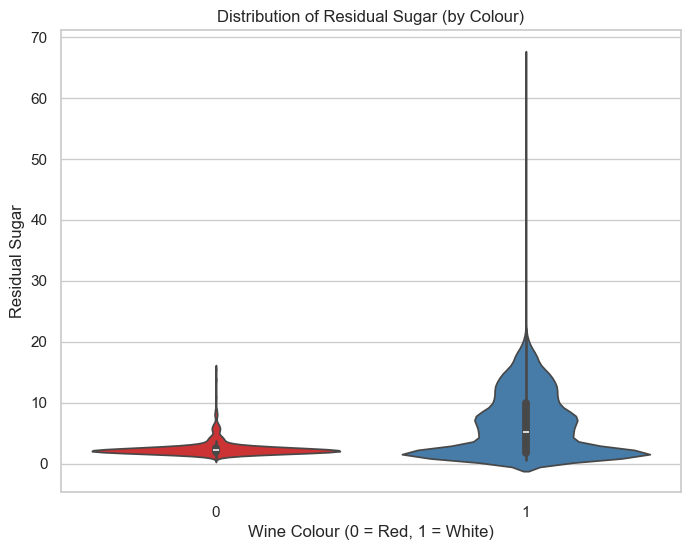

In [63]:
# 5. Violin plot for residual sugar (shows the distribution and density of the feature)
plt.figure(figsize=(8, 6))
sns.violinplot(x='colour', y='residual sugar', data=wine_data, palette="Set1")
plt.title("Distribution of Residual Sugar (by Colour)")
plt.xlabel("Wine Colour (0 = Red, 1 = White)")
plt.ylabel("Residual Sugar")
plt.show()

# Predict Wine Quality (Regression)

## Prepare Data for Predicting Wine Quality

In [46]:
# Split features and target variable
X = wine_data.drop(columns=['quality'])
y = wine_data['quality']

# Split into train, validation, and test sets (70/20/10 split)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.30, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.33, random_state=42)  # 33% of 30% = ~10%

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [47]:
X_train

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
3761            9.9             0.490         0.23            2.40      0.087   
3740            7.7             0.280         0.35           15.30      0.056   
1359           11.6             0.475         0.40            1.40      0.091   
1230            7.7             0.180         0.34            2.70      0.066   
4751            7.6             0.250         1.23            4.60      0.035   
...             ...               ...          ...             ...        ...   
3772            7.6             0.320         0.58           16.75      0.050   
5191            5.6             0.280         0.27            3.90      0.043   
5226            6.4             0.370         0.20            5.60      0.117   
5390            6.5             0.260         0.50            8.00      0.051   
860             7.2             0.620         0.06            2.70      0.077   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
3761                 19.0                 115.0  0.99480  2.77       0.44   
3740                 31.0                 117.0  0.99980  3.27       0.50   
1359                  6.0                  28.0  0.99704  3.07       0.65   
1230                 15.0                  58.0  0.99470  3.37       0.78   
4751                 51.0                 294.0  0.99018  3.03       0.43   
...                   ...                   ...      ...   ...        ...   
3772                 43.0                 163.0  0.99990  3.15       0.54   
5191                 52.0                 158.0  0.99202  3.35       0.44   
5226                 61.0                 183.0  0.99459  3.24       0.43   
5390                 46.0                 197.0  0.99536  3.18       0.47   
860                  15.0                  85.0  0.99746  3.51       0.54   

        alcohol  colour  
3761   9.400000       1  
3740   9.600000       1  
1359  10.033333       0  
1230  11.800000       0  
4751  13.100000       1  
...         ...     ...  
3772   9.200000       1  
5191  10.700000       1  
5226   9.500000       1  
5390   9.500000       1  
860    9.500000       0  

[4547 rows x 12 columns]

In [48]:
X_train_scaled

array([[ 2.09749415e+00,  9.44541345e-01, -6.19125220e-01, ...,
        -6.07582024e-01, -9.09141702e-01,  5.63889186e-01],
       [ 3.88772797e-01, -3.53027559e-01,  2.06940277e-01, ...,
        -1.99847169e-01, -7.41998353e-01,  5.63889186e-01],
       [ 3.41786974e+00,  8.51857852e-01,  5.51134235e-01, ...,
         8.19489967e-01, -3.79854429e-01, -1.77339808e+00],
       ...,
       [-6.20926184e-01,  2.03073400e-01, -8.25641595e-01, ...,
        -6.75537833e-01, -8.25570027e-01,  5.63889186e-01],
       [-5.43257032e-01, -4.76605550e-01,  1.23952215e+00, ...,
        -4.03714597e-01, -8.25570027e-01,  5.63889186e-01],
       [ 4.27035147e-04,  1.74779829e+00, -1.78938468e+00, ...,
         7.19760670e-02, -8.25570027e-01, -1.77339808e+00]])

## Predict Wine Quality: Linear Regression

https://en.wikipedia.org/wiki/Linear_regression

In [49]:
# Train a linear regression model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Validate the model
y_val_pred = model.predict(X_val_scaled)
val_mse = mean_squared_error(y_val, y_val_pred)
print(f'Validation MSE: {val_mse}')

# Test the model
y_test_pred = model.predict(X_test_scaled)
test_mse_lr = mean_squared_error(y_test, y_test_pred)
print(f'Test MSE: {test_mse_lr}')

Validation MSE: 0.5164453011462162
Test MSE: 0.5503372297589264


Decent results - we're predicting wine quality which is on a scale of 1-10 within +/- 0.55 on the test set

And as expected, the test mean squared error (MSE) is slightly higher than the validation MSE which means we're not overfitting

## Predict Wine Quality: XGBoost

https://en.wikipedia.org/wiki/Gradient_boosting

In [50]:
# Train an XGBoost Regressor model
xgb_reg = XGBRegressor(random_state=42)
xgb_reg.fit(X_train_scaled, y_train)

# Validate the model
y_val_pred = xgb_reg.predict(X_val_scaled)
val_mse = mean_squared_error(y_val, y_val_pred)
print(f'Validation MSE: {val_mse}')

# Test the model
y_test_pred = xgb_reg.predict(X_test_scaled)
test_mse_xg = mean_squared_error(y_test, y_test_pred)
print(f'Test MSE: {test_mse_xg}')

Validation MSE: 0.3859434650355681
Test MSE: 0.3918261804819592


The nonlinear gradient boosting model is more accurate than the linear regression model, as expected

## Compare Linear Regression vs. XGBoost

In [51]:
# Print the comparison of the test MSEs
print(f"Linear Regression MSE: {round(test_mse_lr, 3)}, XGBoost MSE: {round(test_mse_xg, 3)}")
# Calculate how many times smaller the XGBoost MSE is
mse_ratio = test_mse_lr / test_mse_xg
# Print how many times smaller the XGBoost MSE is compared to Linear Regression
print(f"The XGBoost MSE is {round(mse_ratio, 2)} times smaller than the Linear Regression MSE.")

Linear Regression MSE: 0.55, XGBoost MSE: 0.392
The XGBoost MSE is 1.4 times smaller than the Linear Regression MSE.


# Predict Wine Colour (Classification)

## Prepare Data for Predicting Wine Color

In [52]:
# Split features and target variable
X = wine_data.drop(columns=['colour'])
y = wine_data['colour']

# Split into train, validation, and test sets (70/20/10 split)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.30, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.33, random_state=42)  # 33% of 30% = ~10%

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

## Predict Wine Colour: Logistic Regression

In [53]:
# Train a Logistic Regression model
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train_scaled, y_train)

# Predict on the validation set
y_val_pred = log_reg.predict(X_val_scaled)
y_test_pred = log_reg.predict(X_test_scaled)

# Validate the model
val_accuracy_lr = accuracy_score(y_val, y_val_pred)
test_accuracy_lr = accuracy_score(y_test, y_test_pred)
print(f'Validation Accuracy: {val_accuracy_lr}')
print(f'Test Accuracy: {test_accuracy_lr}')

Validation Accuracy: 0.9854517611026034
Test Accuracy: 0.9968944099378882


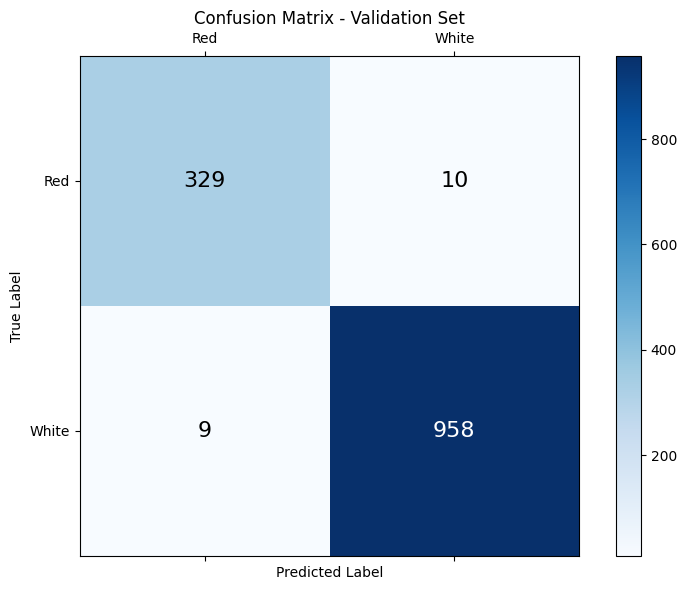

In [54]:
# Confusion matrix for validation data
conf_matrix = confusion_matrix(y_val, y_val_pred)

# Plot confusion matrix using matplotlib
fig, ax = plt.subplots(figsize=(8, 6))
cax = ax.matshow(conf_matrix, cmap=plt.cm.Blues)
plt.title('Confusion Matrix - Validation Set')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
# Add color bar
plt.colorbar(cax)
# Annotate confusion matrix with dynamic text color based on the cell value
threshold = conf_matrix.max() / 2.0  # Compute threshold to change color
for (i, j), val in np.ndenumerate(conf_matrix):
    color = "white" if val > threshold else "black"  # Set text color based on cell value
    ax.text(j, i, f'{val}', ha='center', va='center', color=color, fontsize=16)
# Set x-axis and y-axis tick labels
ax.set_xticks([0, 1])  # Specify tick locations
ax.set_xticklabels(['Red', 'White'])
ax.set_yticks([0, 1])  # Specify tick locations
ax.set_yticklabels(['Red', 'White'])
# Show the plot
plt.tight_layout()
plt.show()

## Predict Wine Colour: XGBoost

In [55]:
# Train an XGBoost Classifier
xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_train_scaled, y_train)

# Predict
y_val_pred = xgb_model.predict(X_val_scaled)
y_test_pred = xgb_model.predict(X_test_scaled)

# Validate the model
val_accuracy_xg = accuracy_score(y_val, y_val_pred)
test_accuracy_xg = accuracy_score(y_test, y_test_pred)
print(f'Validation Accuracy: {val_accuracy_xg}')
print(f'Test Accuracy: {test_accuracy_xg}')

Validation Accuracy: 0.9938744257274119
Test Accuracy: 0.9984472049689441


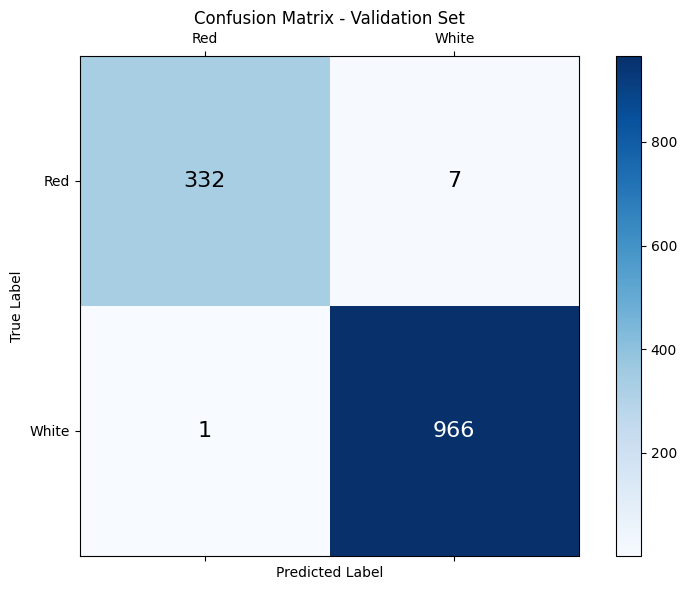

In [56]:
# Confusion matrix for validation data
conf_matrix = confusion_matrix(y_val, y_val_pred)

# Plot confusion matrix using matplotlib
fig, ax = plt.subplots(figsize=(8, 6))
cax = ax.matshow(conf_matrix, cmap=plt.cm.Blues)
plt.title('Confusion Matrix - Validation Set')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Add color bar
plt.colorbar(cax)

# Annotate confusion matrix with dynamic text color based on the cell value
threshold = conf_matrix.max() / 2.0  # Compute threshold to change color
for (i, j), val in np.ndenumerate(conf_matrix):
    color = "white" if val > threshold else "black"  # Set text color based on cell value
    ax.text(j, i, f'{val}', ha='center', va='center', color=color, fontsize=16)

# Set x-axis and y-axis tick labels
ax.set_xticks([0, 1])  # Specify tick locations
ax.set_xticklabels(['Red', 'White'])

ax.set_yticks([0, 1])  # Specify tick locations
ax.set_yticklabels(['Red', 'White'])

# Show the plot
plt.tight_layout()
plt.show()

## Compare Logistic Regression vs. XGBoost

In [57]:
# Calculate the error rates
log_reg_error = 1 - val_accuracy_lr
xgboost_error = 1 - val_accuracy_xg

# Calculate how many times smaller the XGBoost error rate is
error_ratio = log_reg_error / xgboost_error

# Print the comparison
print(f"Logistic Regression error: {round(log_reg_error, 3)}, XGBoost error: {round(xgboost_error, 3)}")
print(f"The XGBoost error rate is {round(error_ratio, 2)} times smaller than the Logistic Regression error rate.")


Logistic Regression error: 0.015, XGBoost error: 0.006
The XGBoost error rate is 2.37 times smaller than the Logistic Regression error rate.
